In [40]:
# Evaluate Linear Regression (from lab4.3.1) and iterate with Categorical (from lab4.1)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
numerical = df.select_dtypes(include=np.number)
numerical.dropna(inplace=True)

# Select and encode categorical data (from lab4.1)
categorical = df.select_dtypes(include=object)
categorical.dropna(inplace=True)

ord_encoded = categorical[['education','month','vehicle_size']]
ord_encoded = ord_encoded.replace({
    'education':
        {'high school or below': 1, 'college': 2, 'bachelor': 3, 'master': 4, 'doctor': 5},
    'month': {'jan': 1, 'feb': 2},
    'vehicle_size': {'small': 1, 'medsize': 2, 'large': 3}
})

hot_encoded = categorical.drop(['education','month','vehicle_size','effective_to_date'], axis=1)
hot_encoded = pd.get_dummies(hot_encoded, drop_first=True, dtype=int)

cat_encoded = pd.concat([ord_encoded,hot_encoded], axis=1)
all_data = pd.concat([numerical,cat_encoded], axis=1)
all_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,education,month,...,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,4809,48029,61,7,52,0,9,292,2,2,...,1,0,0,0,0,0,0,0,0,0
1,2228,92260,64,3,26,0,1,744,2,1,...,0,1,0,1,0,0,0,0,0,0
2,14947,22139,100,34,31,0,2,480,3,2,...,1,0,0,1,0,0,0,0,1,0
3,22332,49078,97,10,3,0,2,484,2,1,...,0,0,1,0,0,0,0,0,0,0
4,9025,23675,117,33,31,0,7,707,3,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214,3,1,...,1,0,0,0,1,1,0,0,0,0
10685,5259,61146,65,7,68,0,6,273,2,1,...,0,0,1,0,0,0,0,0,0,0
10686,23893,39837,201,11,63,0,2,381,3,2,...,0,0,0,0,1,0,1,0,0,0
10687,11971,64195,158,0,27,4,6,618,2,2,...,0,0,1,0,0,0,0,0,1,0


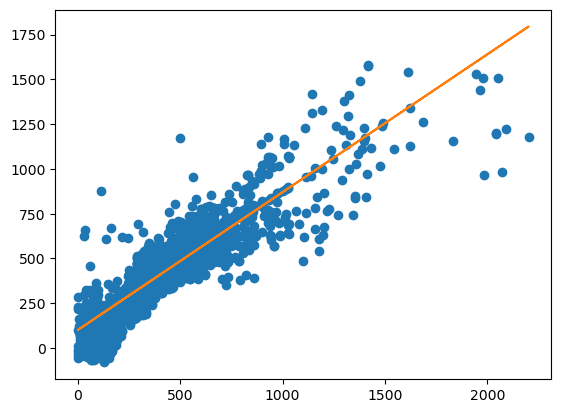

In [20]:
X = all_data.drop('total_claim_amount', axis=1)
y = all_data['total_claim_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(np.array(X_train))
X_train_scaled = scaler.transform(np.array(X_train))
lm = LinearRegression() # fit_intercept = True
model = lm.fit(X_train_scaled,y_train)
X_test_scaled = scaler.transform(np.array(X_test))
y_pred = model.predict(X_test_scaled)
residuals = np.array(y_test - y_pred)
res_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred, 'residual':residuals})
plt.plot(y_test, y_pred, 'o')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test+b)


In [21]:
# Model Validation

R2=r2_score(y_test,y_pred)
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

print("MSE:", mse(y_test,y_pred))                # Mean Squared Error
print("RMSE:", np.sqrt(mse(y_test,y_pred)))      # Root Mean Square Error
print("MAE:", mae(y_test,y_pred))                # Mean Absolute Error
print("R2:", R2)                                 # Coefficient of Determination (R2)
print("Adj_R2:", Adj_R2)                         # Adjusted R2
print("R2_train:", R2_train)                     # R2 Train
print("R2_test:", R2_test)                       # R2 Test = R2


MSE: 18355.122958097276
RMSE: 135.4810797052388
MAE: 93.51963482322002
R2: 0.7738895066624539
Adj_R2: 0.7689152920792272
R2_train: 0.7696610575097302
R2_test: 0.7738895066624539


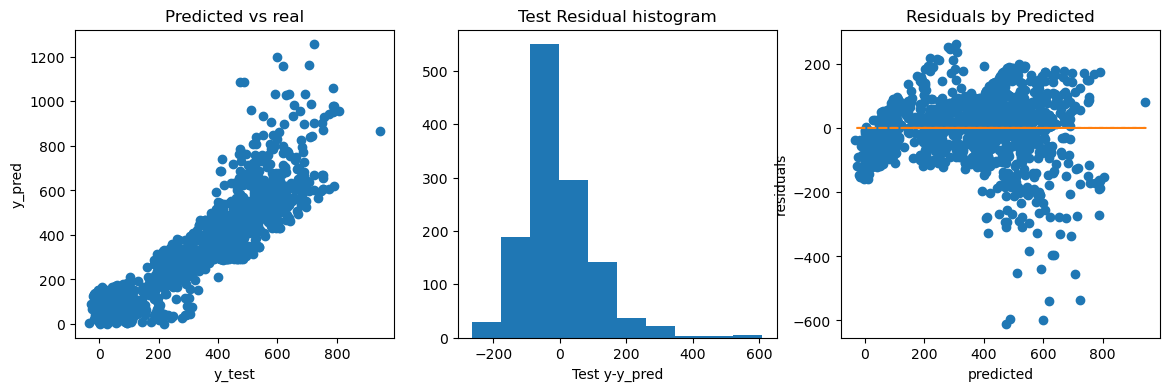

In [46]:
# y_pred vs y scatterplot
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Predicted vs real")

# Residual histogram: check normality of distribution
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Residual histogram")

# Homoscedasticity Check
ax[2].plot(y_pred,y_pred-y_test,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

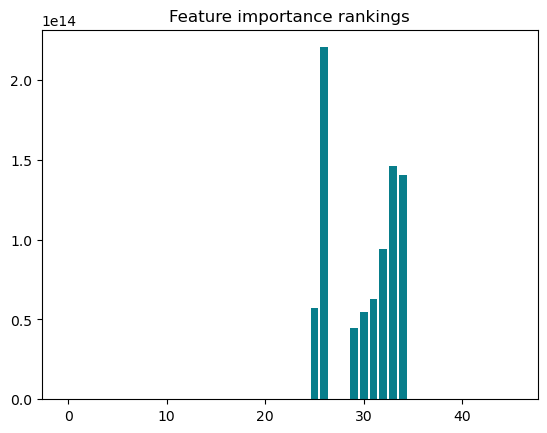

,Variable,Importance,name
26,26,2.205415e+14,policy_type_personal auto
33,33,1.460491e+14,policy_special l1
34,34,1.406467e+14,policy_special l2
32,32,9.393625e+13,policy_personal l3
31,31,6.287044e+13,policy_personal l2
25,25,5.713164e+13,marital_status_single
30,30,5.473625e+13,policy_personal l1
29,29,4.475316e+13,policy_corporate l3


In [36]:
feature_importances = pd.DataFrame(data={
    'Variable': pd.DataFrame(X_train_scaled).columns,
    'Importance': abs(model.coef_.reshape(len(pd.DataFrame(X_train_scaled).columns),))
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.bar(x=feature_importances['Variable'].iloc[:], height=feature_importances['Importance'].iloc[:], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='horizontal')
plt.show()

important_features = feature_importances.sort_values('Importance', ascending=False).head(8)
features = all_data.columns
important_features['name'] = features[important_features['Variable']]
important_features

MSE: 10982.160457215552
RMSE: 104.79580362407434
MAE: 77.42884280396402
R2: 0.7449655412195493
Adj_R2: 0.7354043471658405
R2_train: 0.759473550023075
R2_test: 0.7449655412195493


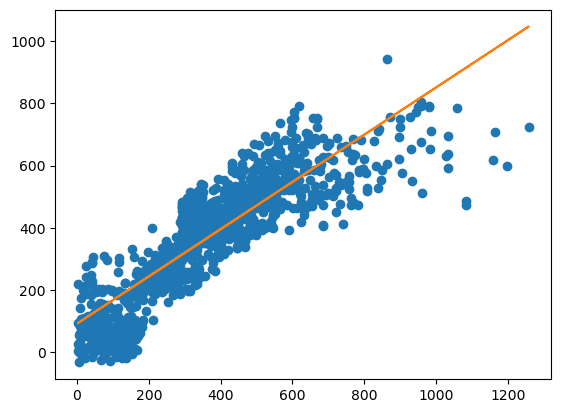

In [57]:
"""
=======================================================================================
|                                                                                     |
|  Rerun the model after removing the outliers and compare the results using the R2.  |
|                                                                                     |
=======================================================================================

"""

from scipy import stats

without_outliers = all_data[(np.abs(stats.zscore(all_data)) < 3).all(axis=1)]

X = without_outliers.drop('total_claim_amount', axis=1)
y = without_outliers['total_claim_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(np.array(X_train))
X_train_scaled = scaler.transform(np.array(X_train))
lm = LinearRegression() # fit_intercept = True
model = lm.fit(X_train_scaled,y_train)
X_test_scaled = scaler.transform(np.array(X_test))
y_pred = model.predict(X_test_scaled)
residuals = np.array(y_test - y_pred)
res_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred, 'residual':residuals})
plt.plot(y_test, y_pred, 'o')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test+b)

R2=r2_score(y_test,y_pred)
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

print("MSE:", mse(y_test,y_pred))                # Mean Squared Error
print("RMSE:", np.sqrt(mse(y_test,y_pred)))      # Root Mean Square Error
print("MAE:", mae(y_test,y_pred))                # Mean Absolute Error
print("R2:", R2)                                 # Coefficient of Determination (R2)
print("Adj_R2:", Adj_R2)                         # Adjusted R2
print("R2_train:", R2_train)                     # R2 Train
print("R2_test:", R2_test)                       # R2 Test = R2

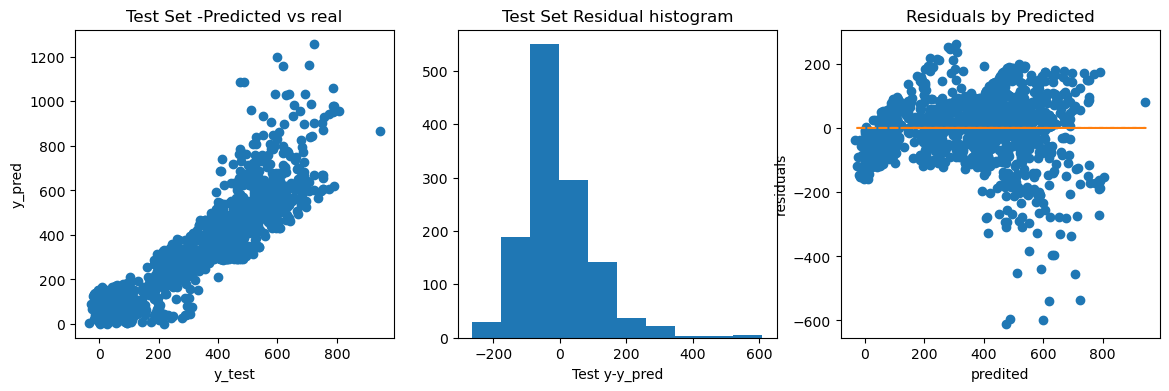

In [58]:
# y_pred vs y scatterplot
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Residual histogram: check normality of distribution
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

# Homoscedasticity Check
ax[2].plot(y_pred,y_pred-y_test,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [59]:
# Feature Importance
feature_importances = pd.DataFrame(data={
    'Variable': pd.DataFrame(X_train_scaled).columns,
    'Importance': abs(model.coef_.reshape(len(pd.DataFrame(X_train_scaled).columns),))
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

important_features = feature_importances.sort_values('Importance', ascending=False).head(8)
features = all_data.columns
important_features['name'] = features[important_features['Variable']]
important_features

,Variable,Importance,name
31,31,4.326352e+13,policy_personal l2
30,30,3.790924e+13,policy_personal l1
25,25,3.338638e+13,marital_status_single
29,29,3.166315e+13,policy_corporate l3
10,10,7.204408e+10,vehicle_size
17,17,9.344938e+09,employment_status_employed
18,18,5.204551e+09,employment_status_medical leave
15,15,1.822730e+09,coverage_extended
